# **Lab 02:** Creating your own CNN with PyTorch

### **General Instructions**
- In this lab, you'll create your own CNN in order to surpass an accuracy of 70% on CIFAR-10.
### **System Diagram Requirement**
You must include a **diagram of your system pipeline** showing the CNN architecture.

This diagram is **required** to understand your model logic.

You can draw it digitally, use any Pyhton library, or by hand and include an image.

If your diagram was created assisted by GenAI, also include the `promt` used in the next block. If the generated system diagram is not clear or you cannot interpret it, adjust the prompt as needed or draw it by hand.


*If you used GenAI, write your prompt here..*

"Create a technical architecture diagram for a CNN: Input (32x32x3) -> [Conv(3x3, 32) + BatchNorm + ReLU] x2 -> MaxPool(2x2) -> [Conv(3x3, 64) + BatchNorm + ReLU] x2 -> MaxPool(2x2) -> Flatten -> Dropout(0.3) -> FullyConnected(512) -> ReLU -> Dropout(0.3) -> Output(10)."

### **Load the CIFAR-10 dataset**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### **Create your CNN with PyTorch and train it on the CIFAR-10 dataset**

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        # Bloque 1
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Bloque 2
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Clasificador
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(64 * 8 * 8, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x

model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Ciclo de entrenamiento
epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(trainloader):.4f}")

Epoch 1/15 - Loss: 1.4384
Epoch 2/15 - Loss: 1.0556
Epoch 3/15 - Loss: 0.9065
Epoch 4/15 - Loss: 0.8284
Epoch 5/15 - Loss: 0.7745
Epoch 6/15 - Loss: 0.7332
Epoch 7/15 - Loss: 0.7008
Epoch 8/15 - Loss: 0.6745
Epoch 9/15 - Loss: 0.6550
Epoch 10/15 - Loss: 0.6318
Epoch 11/15 - Loss: 0.6121
Epoch 12/15 - Loss: 0.5921
Epoch 13/15 - Loss: 0.5755
Epoch 14/15 - Loss: 0.5643
Epoch 15/15 - Loss: 0.5519


### **Evaluate the accuracy of your CNN (must be >= 70%)**

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Final Accuracy on CIFAR-10: {100 * correct / total:.2f}%')

Final Accuracy on CIFAR-10: 81.78%


### **System Diagram**

Insert your system diagram below (image or drawing). It must clearly show:

- Number of convolutional layers

- Kernel size(s)

- Pooling layers (if any)  

- etc..  

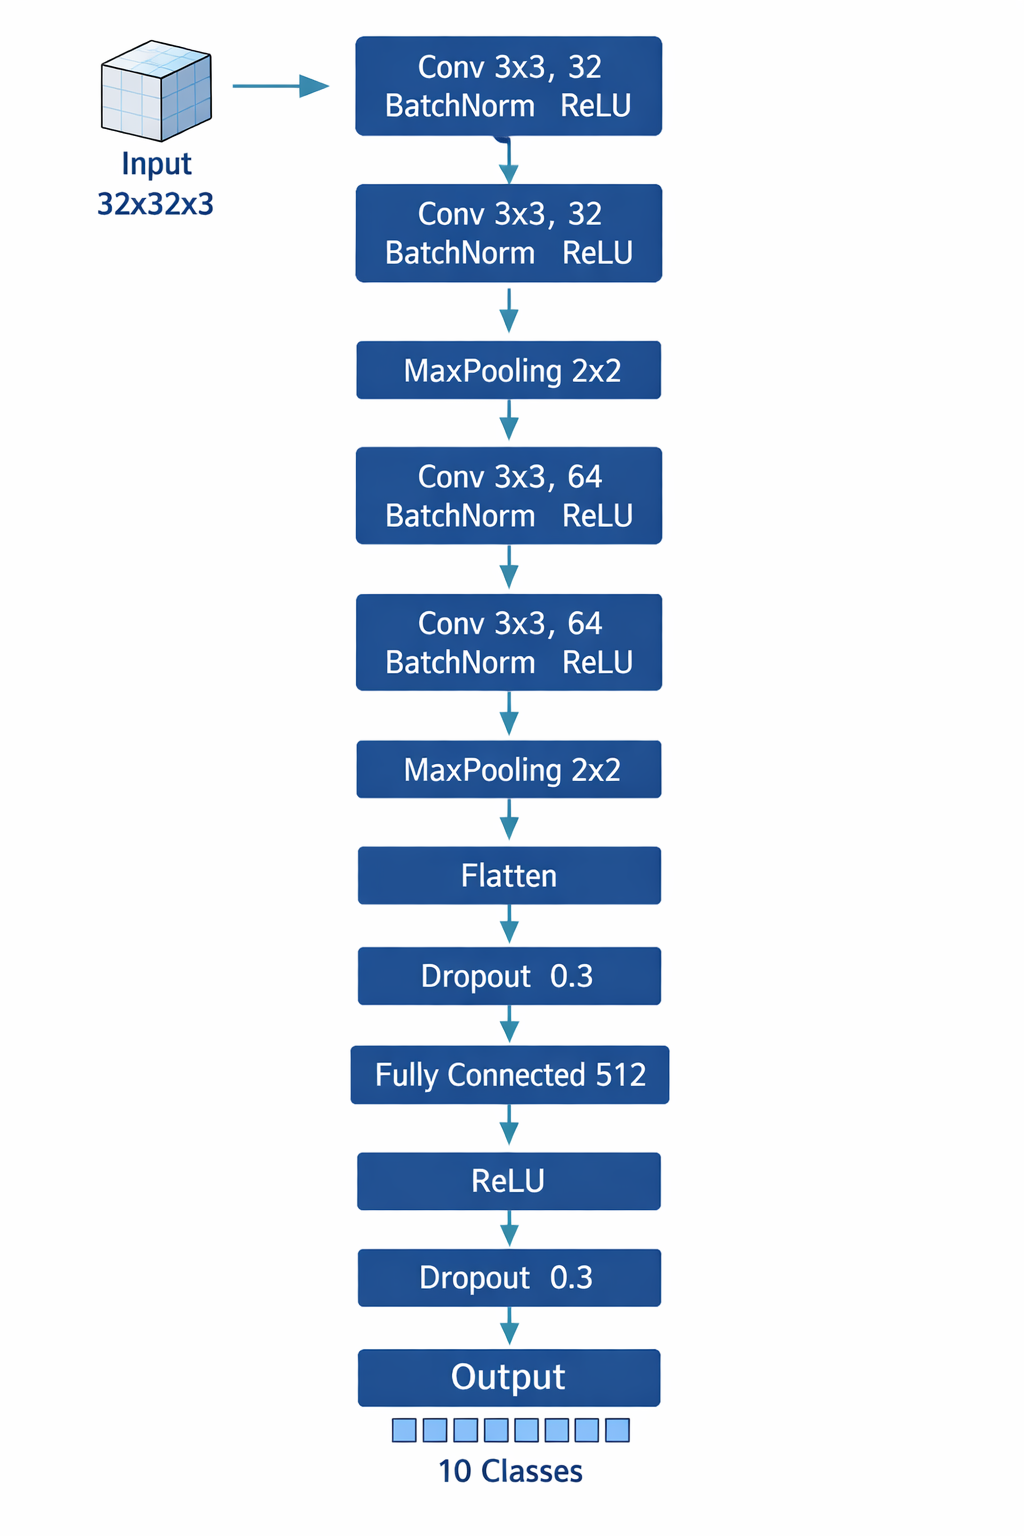

### **Written Analysis Questions**



**1. Why increasing depth could improve performance.**

Increasing the depth of a network allows it to learn a hierarchy of features. Initial layers detect simple patterns like edges and colors, while deeper layers can combine these to recognize more complex and abstract shapes (like eyes, wheels, or specific textures), leading to better representation of the data.

**2. Under what conditions deeper networks may hurt performance.**

Deeper networks can suffer from the vanishing gradient problem, where the error signal becomes too small to update the early layers. Additionally, if the model has too many parameters relative to the amount of training data, it can lead to overfitting, where the network memorizes the training set instead of learning to generalize.

**3. How could dropout, batch normalization, or data augmentation help?**

- Dropout: Randomly deactivates neurons during training, which prevents the network from becoming overly dependent on specific connections and reduces overfitting.

- Batch Normalization: Normalizes the activations of each layer, which stabilizes and accelerates the training process, allowing for higher learning rates.

- Data Augmentation: Artificially increases the size of the dataset by creating modified versions of images (rotations, flips), helping the model become invariant to these changes and improve generalization.

**4. How would you determine whether your CNN is overfitting or underfitting?**

By monitoring the training vs. validation loss/accuracy. If the training accuracy is much higher than the validation accuracy (and the validation loss starts to increase), the model is overfitting. If both training and validation accuracies remain low and plateau early, the model is underfitting.

**5. Which architectural components most impact computational cost?**

The convolutional layers are the most computationally expensive due to the high number of matrix multiplications (FLOPs) required. However, the first fully connected (Linear) layer after flattening usually contains the highest number of trainable parameters, impacting memory usage.

**6. Whether the accuracy gain justifies the added complexity in a real-world deployment scenario.**

This depends on the use case. In critical systems (like medical diagnosis or autonomous driving), even a 1% gain in accuracy is crucial and justifies the complexity. In real-time mobile applications, a lighter model (like MobileNet) might be preferred to ensure low latency and battery efficiency, even if it is slightly less accurate.